In [ ]:
%matplotlib inline

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
vocab = pd.read_csv("vocab.nips.txt", header=None, names=['Vocab'])
#docword = pd.read_csv("docword.nips.txt", sep = " ", header=None)# names=['DocID', 'WordID', 'Count'])
docword = np.loadtxt("docword.nips.txt")

In [ ]:
docword

In [ ]:
num_docs = 1500
num_vocab = 12419
num_nonzero = 746316

In [ ]:
#Cluster this to 30 topics, using a simple mixture of multinomial topic model, as lectured in class.

In [ ]:
documents = np.zeros((num_docs+1, num_vocab+1)) #adding one for index out of array error 

In [ ]:
documents

In [ ]:
for i in range(0,docword.shape[0]):
    documents[docword[i][0].astype(int)][docword[i][1].astype(int)] += docword[i][2]

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
topics = 30

km = KMeans(n_clusters=topics, random_state=0)
km.fit(documents)

In [ ]:
trans_documents = np.transpose(documents)

In [ ]:
#np.set_printoptions(threshold=np.nan)
trans_documents

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  2. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
running iteration 1
Difference in quality is 1.0
running iteration 2
Difference in quality is 0.0307483761623
running iteration 3
Difference in quality is 0.00448377116363
running iteration 4
Difference in quality is 0.00343808378037
running iteration 5
Difference in quality is 0.00149471799158
running iteration 6
Difference in quality is 0.00061254865429
running iteration 7
Difference in quality is 6.40255421928e-05

top 10 words for each cluster
['learning', 'action', 'function', 'policy', 'model', 'algorithm', 'system', 'control', 'reinforcement', 'problem']
['data', 'set', 'algorithm', 'vector', 'training', 'function', 'problem', 'point', 'learning', 'method']
['concept', 'tracker', 'mistake', 'adversary', 'rate', 'algorithm', 'examples', 'learning', 'change', 'hypothesis']
['face', 'i

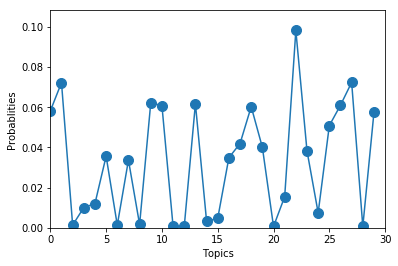

In [42]:
num_docs = 1500
num_vocab = 12419
num_nonzero = 746316
num_clusters = 30

docword = np.loadtxt('docword.nips.txt', skiprows=3)
#k is total number of words

documents = np.zeros((num_docs,num_vocab))
for observation in docword:
    documents[observation[0].astype(int)-1][observation[1].astype(int)-1] = observation[2]

In [35]:
documents.shape

(1500, 12419)

In [36]:
documents

array([[ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  2., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [56]:
#since k-means is not recommended, created intialization with assistance from one section of https://github.com/rhiga2/AppliedML/blob/fd6d55bfe5e0de08093bf8a9a5db8ef4e450a690/hw5/.ipynb_checkpoints/hw5-checkpoint.ipynb
pi = np.ones(shape = num_clusters)/num_clusters
    
#initialize multinomial parameters/cluster centers
P = np.zeros(shape = (num_vocab, num_clusters)) # multinomial parameters, rows = features, cols = topics
centroid = np.random.randint(0, num_docs-1, num_clusters)
ones = np.ones(shape = num_vocab) #don't initialize topic probability of zero https://piazza.com/class/jchzguhsowz6n9?cid=1111
for i, idx in enumerate(centroid):
    P[:, i] = (documents[idx, :] + ones)/(np.sum(documents[idx, :]) + num_vocab*ones)

print(pi)
print(P)
print(len(P))

[ 0.03333333  0.03333333  0.03333333  0.03333333  0.03333333  0.03333333
  0.03333333  0.03333333  0.03333333  0.03333333  0.03333333  0.03333333
  0.03333333  0.03333333  0.03333333  0.03333333  0.03333333  0.03333333
  0.03333333  0.03333333  0.03333333  0.03333333  0.03333333  0.03333333
  0.03333333  0.03333333  0.03333333  0.03333333  0.03333333  0.03333333]
[[  7.25005438e-05   7.20461095e-05   7.32922897e-05 ...,   7.36539736e-05
    7.55287009e-05   7.63650248e-05]
 [  7.25005438e-05   7.20461095e-05   7.32922897e-05 ...,   7.36539736e-05
    7.55287009e-05   7.63650248e-05]
 [  7.25005438e-05   7.20461095e-05   7.32922897e-05 ...,   7.36539736e-05
    7.55287009e-05   7.63650248e-05]
 ..., 
 [  7.25005438e-05   7.20461095e-05   7.32922897e-05 ...,   7.36539736e-05
    7.55287009e-05   7.63650248e-05]
 [  7.25005438e-05   7.20461095e-05   7.32922897e-05 ...,   7.36539736e-05
    7.55287009e-05   7.63650248e-05]
 [  7.25005438e-05   7.20461095e-05   7.32922897e-05 ...,   7.36539